# Gap junction of Rz cell


__Simulations part__


_Requirements:_ For this exercise you will need Neuron 8, Python 3 and the Python packages Matplotlib
for plotting and Numpy for handling arrays.


We start by importing the relevant packages.

In [1]:
# import Neuron's hoc interpreter
from neuron import h
h.load_file('stdrun.hoc')

# set default units
from neuron.units import ms, mV
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import gridspec
import matplotlib

Then we define the model neuron.

In [2]:
# initialize by loading my1stnrn.hoc
h.xopen('my_gap.hoc')
h.xopen('my_connection.hoc')
h.load_file('gapjunction.hoc')


1.0

# 1.1 Create two cells
 Define the voltage clamp stimulation.



In [23]:
# get access to the neuron that was created by my1stnrn.hoc
# it only has a soma
num_cell  =2 
neurons = []
vclamps = []
for i in range(0,num_cell):
    cell = h.rezcell()
    
    # set position of the cell
    # x = (i+1)*1000.
    # y = (i+1)*0.
    # cell.position(x, y, 0)
    # cell.setgid(i)
    neurons.append(cell)

    # neurons[i].nseg = 1
    # neurons[i].diam = 18.8
    # neurons[i].L = 18.8
    # neurons[i].Ra = 123.0
    # neurons[i].g_pas = 2.E-05
    
    vclamps.append(h.VClamp(0.5, sec = cell.soma)) # to maintain the voltage at a certian value


# 1.2 create gap junction

In [94]:
# add gap junction
gj_conductance = 1   #[mS]
# position of gj in axonal sections:
dend_section1 = 0 # it is not used in our case
dend_section2 = 0  # it is not used in our case
section1_pos = 1    # position within section1
section2_pos = 1   # position within section2
gap = h.dendgapjunction(neurons[0], dend_section1, neurons[1], dend_section1, gj_conductance, section1_pos, section2_pos)

# 2. Add stimulus and record the data
## 2.1 record the voltage at gap junction

In [95]:
# record the current flow through the gap junction

i_gap = h.Vector()
v0_gap = h.Vector() # voltage at the gap junction
v1_gap = h.Vector() 

# i_gap.record(neurons[0].dend(section1_pos)._ref_i)
v0_gap.record(neurons[0].dend(section1_pos)._ref_v)
v1_gap.record(neurons[1].dend(section2_pos)._ref_v)

Vector[41]

## 2.2 iclamp stimulus

In [96]:
num_pulses = 1
inter_stim_interval = 5
h.tstop = 100


stim = h.List()
for i in range(num_pulses):
    stim.append(h.IClamp(0.5, sec=neurons[0].soma)) # give stimulus at neuron0
    stim[i].amp = 0
    stim[i].delay = 5 + inter_stim_interval * i
    stim[i].dur = 1




## 2.3 vclamp stimulus

In [140]:
# for v_clamp

# for neuron0
vclamps[0].amp[0] = -70 #voltage
vclamps[0].amp[1] = -50
vclamps[0].amp[2] = -70

vclamps[0].dur[0] = 10
vclamps[0].dur[1] = 20
vclamps[0].dur[2] = 100

# for neuron1
vclamps[1].amp[0] = -70 #voltage
# v_stim[1].amp[1] = -50
vclamps[1].dur[0] = 100
# v_stim[1].dur[1] = 20
# v_stim[i].dur[1] = 10
    
    

In [141]:
# vectors to store data
t_vec = h.Vector()                  # Time stamp vector
t_vec.record(h._ref_t)
v_cell0 = h.Vector()                 # membrane potential vector for first pyramidal cell
v_cell1 = h.Vector()                 # membrane potential vector for second pyramidal cell


# v_pyrA.record(pyrA.soma(0.5)._ref_v)
# v_pyrB.record(pyrB.soma(0.5)._ref_v)
v_cell0.record(neurons[0].soma(0.5)._ref_v)
v_cell1.record(neurons[1].soma(0.5)._ref_v)
# note that the voltage is recorded in the axon

# record stimuli
istim = h.List()
for i in range(0, num_pulses):
    istim.append(h.Vector())
    istim[i].record(stim[i]._ref_i)

# record stimuli
vstim = h.List()
for i in range(0, 2):
    vstim.append(h.Vector())
    vstim[i].record(vclamps[i]._ref_i)

In [142]:
h.init()
print('running simulation ...')
h.run()

running simulation ...


0.0

# plot the results

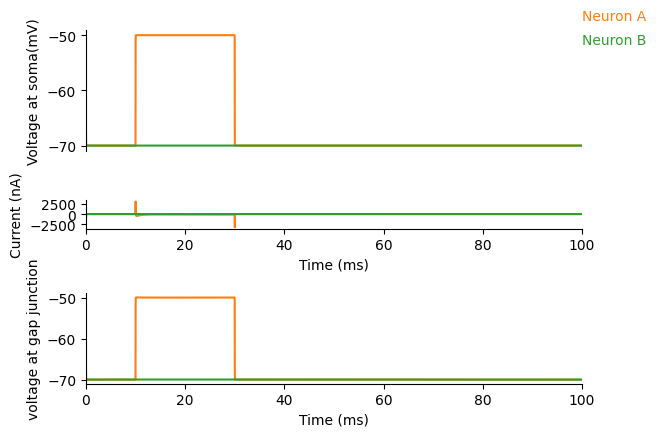

In [143]:
fig = plt.figure()
gs = gridspec.GridSpec(24, 2)

# voltage axis
ax1 = fig.add_subplot(gs[0:8, :])
ax1.plot(t_vec, v_cell0, '-', color='C01')
ax1.plot(t_vec, v_cell1, '-', color='C02')
max_v = max(v_cell0.max(), v_cell1.max())
fig.text(.9, .9, "Neuron A", color='C01')
fig.text(.9, .85, "Neuron B", color='C02')
ax1.set_ylabel('Voltage at soma('+h.units('v')+')')
ax1.axes.get_xaxis().set_visible(False)
ax1.set_xlim([0, h.tstop])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

# current axis
ax2 = fig.add_subplot(gs[11:13, :], sharex=ax1)
ax2.plot(np.array(t_vec)[1:], np.array(vstim[0])[1:], '-', color='C01')
ax2.plot(np.array(t_vec)[1:], np.array(vstim[1])[1:], '-', color='C02')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_ylabel('Current (nA)')
ax2.set_xlabel('Time ('+h.units('t')+')')
ax2.set_xlim([0, h.tstop])

# current axis
ax3 = fig.add_subplot(gs[17:23, :], sharex=ax1)
ax3.plot(t_vec, v0_gap, '-', color='C01',label ='dendrite A')
ax3.plot(t_vec, v1_gap, '-', color='C02',label ='dendrite B')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.set_ylabel('voltage at gap junction')
ax3.set_xlabel('Time ('+h.units('t')+')')
ax3.set_xlim([0, h.tstop])
plt.show()


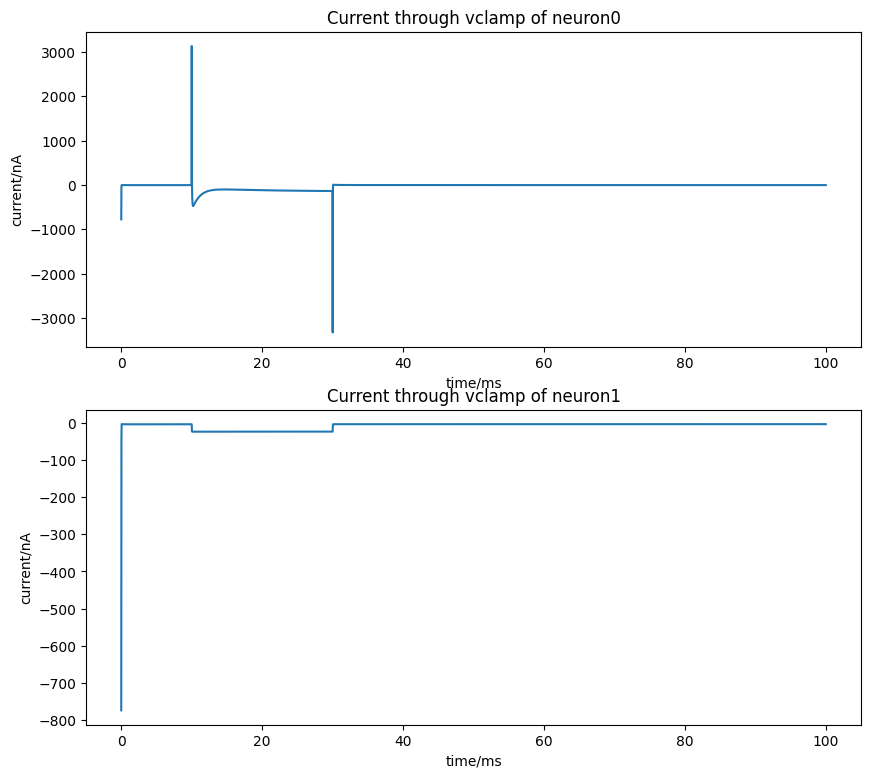

In [144]:
fig, axis= plt.subplots(2,1,figsize = (10,9) )
axis = axis.flatten()
for i in np.arange(0,2):
    axis[i].plot(np.array(t_vec)[1:], np.array(vstim[i])[1:], '-', label = 'neuron%d'%i)
    axis[i].set_xlabel('time/ms')
    axis[i].set_ylabel('current/nA')
    axis[i].set_title('Current through vclamp of neuron%d'%i)
# ax2.plot(np.array(t_vec)[1:], np.array(vstim[1])[1:], '-', color='C02')
# ax2.spines['top'].set_visible(False)

# 3. Caculate the R_gap/g_gap

In [146]:
t_array = np.array(t_vec)
t_unit= t_array[1]- t_array[0]
print('unit time: %.3f ms'%t_unit)

unit time: 0.025 ms


In [147]:
beign_idx = int(10/t_unit)+10
end_idx = int(30/t_unit)

In [148]:
v0_array = np.array(v0_gap)
v1_array = np.array(v1_gap)
ij_array = np.array(vstim[1]) # vclamp current of neuron 1

v_arrays = [v0_array, v1_array]

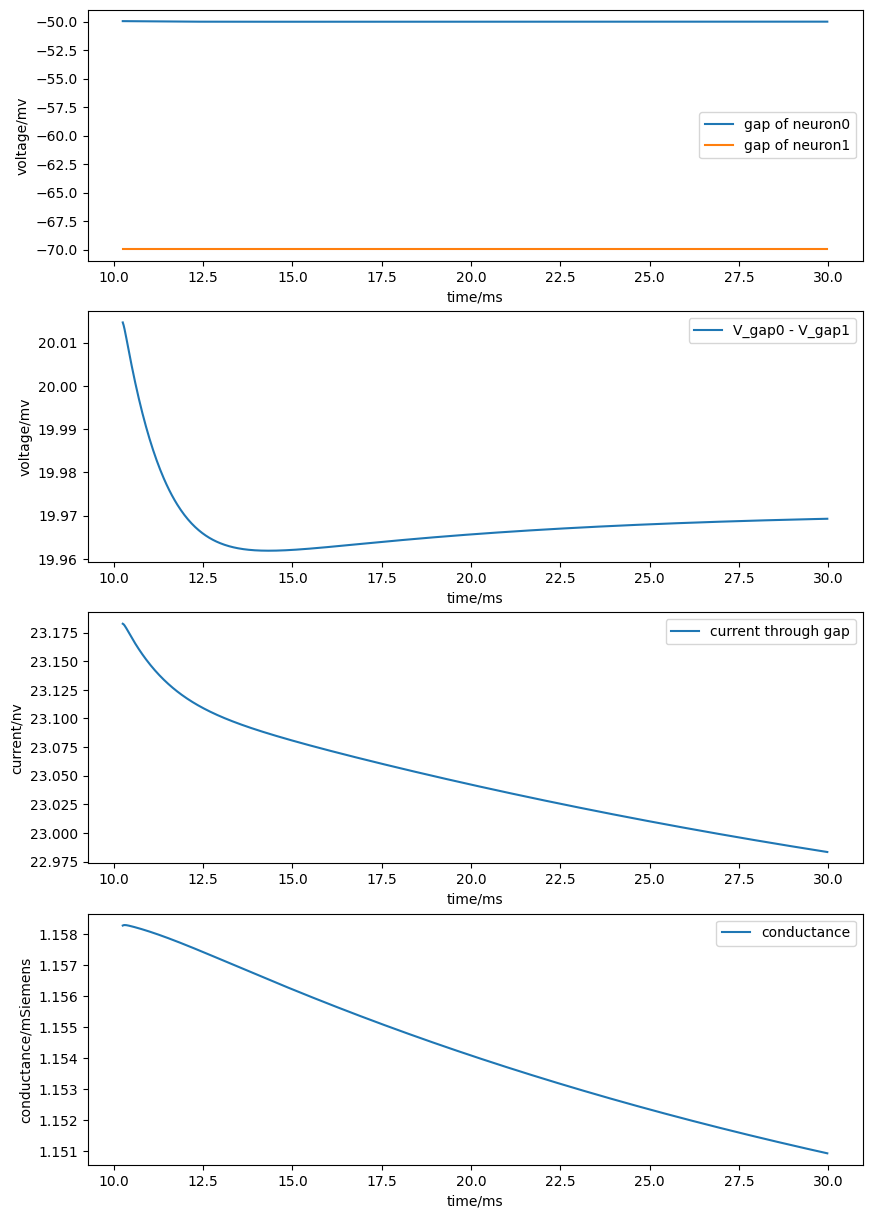

In [149]:
fig, axis = plt.subplots(4,1,figsize = (10,15))
axis = axis.flatten()
for i in [0,1]:
    axis[0].plot(t_array[beign_idx:end_idx], v_arrays[i][beign_idx:end_idx],label = 'gap of neuron%d'%i)
    axis[0].set_xlabel('time/ms')
    axis[0].set_ylabel('voltage/mv')
axis[0].legend()

# plot the difference between voltage
axis[1].plot(t_array[beign_idx:end_idx], v_arrays[0][beign_idx:end_idx]-v_arrays[1][beign_idx:end_idx],label = 'V_gap0 - V_gap1')
axis[1].set_xlabel('time/ms')
axis[1].set_ylabel('voltage/mv')
axis[1].legend()

# plot the current flow through gap
axis[2].plot(t_array[beign_idx:end_idx], np.abs(ij_array[beign_idx:end_idx]),label = 'current through gap')
axis[2].set_xlabel('time/ms')
axis[2].set_ylabel('current/nv')
axis[2].legend()

# for the conductance
conduc = ij_array[beign_idx:end_idx]/(v_arrays[0][beign_idx:end_idx]-v_arrays[1][beign_idx:end_idx])
axis[3].plot(t_array[beign_idx:end_idx], np.abs(conduc),label = 'conductance')
axis[3].set_xlabel('time/ms')
axis[3].set_ylabel('conductance/mSiemens')
axis[3].legend()
